In [1]:
# import os
# import sys
# sys.path.insert(0, os.path.join('..', 'app'))

In [1]:
cd ../app

/home/din15/Downloads/Program/Parking/app


In [2]:
import os
from lib.data import ParkingData

DATA_DIR = 'data'

data_obj = ParkingData(data_dir=DATA_DIR)

/home/din15/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
22/12/12 22:43:58 WARN Utils: Your hostname, din15 resolves to a loopback address: 127.0.1.1; using 192.168.1.239 instead (on interface wlp3s0)
22/12/12 22:43:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/12/12 22:43:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/12 22:44:03 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debu

In [3]:
# data_obj.write_ml()
data_obj.load_ml()

In [4]:
train_sample = data_obj.train_data.sample(0.01).collect()
test_sample = data_obj.test_data.sample(0.01).collect()

In [4]:
import numpy as np

In [30]:
# Data Preprossing
# DurationMinutes       CASE WHEN DurationMinutes IS NULL THEN 0 ELSE LOG(DurationMinutes+1) END    ; MAX=12 
# TimeDiff from start
# TimeDiff to end
# Duration              CASE WHEN Duration IS NULL THEN 0 ELSE LOG(Duration+1) END                  ; MAX=7
# DisabilityExt         CASE WHEN DisabilityExt IS NULL THEN 0 ELSE LOG(DisabilityExt+1) END        ; MAX=6
df = data_obj.query("""
SELECT (CAST(EndTime AS LONG) - CAST(TO_TIMESTAMP(DATE_FORMAT(ArrivalTime, "HH:mm:ss"), "HH:mm:ss") AS LONG)) /3600 AS hr_to_end
     , (CAST(TO_TIMESTAMP(DATE_FORMAT(DepartureTime, "HH:mm:ss"), "HH:mm:ss") AS LONG) - CAST(StartTime AS LONG)) /3600 AS hr_from_start
     , StartTime , DepartureTime
FROM train

""", df=False).show()


+------------------+-------------------+-------------------+-------------------+
|         hr_to_end|          hr_to_end|          StartTime|      DepartureTime|
+------------------+-------------------+-------------------+-------------------+
|3.5755555555555554| 2.7066666666666666|1970-01-01 10:00:00|2020-04-28 12:42:24|
|              null|               null|               null|2020-04-16 22:48:27|
|              null|               null|               null|2020-04-19 12:35:59|
|              null|               null|               null|2020-04-20 07:01:44|
|               0.0|                4.5|1970-01-01 16:00:00|2020-04-14 20:30:00|
|              null|               null|               null|2020-04-09 17:11:20|
|              null|               null|               null|2020-04-22 20:30:00|
|            5.8875|0.12083333333333333|1970-01-01 10:00:00|2020-03-27 10:07:15|
|              null|               null|               null|2020-04-06 20:30:00|
|              null|        

In [ ]:
df

,LogDisabilityExt
0,5.484797
1,NaN
2,NaN
3,NaN
4,0.000000
...,...
3187867,6.175867
3187868,NaN
3187869,4.795791
3187870,4.795791


array([[<AxesSubplot:title={'center':'LogDisabilityExt'}>]], dtype=object)

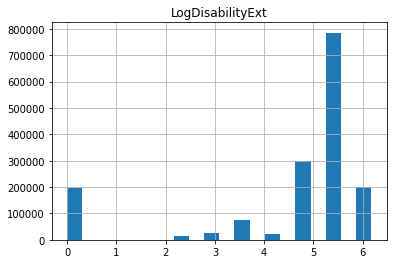

In [ ]:
df.hist(bins=20)

In [9]:
data_obj.train_data.show()

+-----+-------------------+-------------------+---------------+-----------+--------------+----------+-------+------------+-------------------+-------------------+--------+-------------+-------------+------------+--------+-----+--------+-----------+----------+------+--------+------------+---------------+--------------+
|BayId|        ArrivalTime|      DepartureTime|DurationMinutes|InViolation|VehiclePresent|is_holiday|WeekDay|no_br_record|          StartTime|            EndTime|Duration|EffectiveOnPH|DisabilityExt|loading_zone|disabled|meter|clearway|no_stopping|no_parking|ticket|letter_p|exempt_other|exempt_resident|exempt_disable|
+-----+-------------------+-------------------+---------------+-----------+--------------+----------+-------+------------+-------------------+-------------------+--------+-------------+-------------+------------+--------+-----+--------+-----------+----------+------+--------+------------+---------------+--------------+
| 1200|2020-04-28 12:25:28|2020-04-28 12

In [7]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO

In [ ]:
import gym
from gym import spaces

class ParkingEnv(gym.Env):
  """Custom Environment that follows gym interface"""
  metadata = {'render.modes': ['human']}

  def __init__(self, data_obj, model='train'):
    super(ParkingEnv, self).__init__()
    # Define action and observation space
    # They must be gym.spaces objects
    # Example when using discrete actions:
    self.action_space = spaces.Discrete(2)
    # Example for using image as input:
    self.observation_space = spaces.Box(low=0, high=255,
                                        shape=(HEIGHT, WIDTH, N_CHANNELS), dtype=np.uint8)

  def step(self, action):
    ...
    return observation, reward, done, info

  def reset(self):
    ...
    return observation  # reward, done, info can't be included

  def render(self, mode='human'):
    ...

  def close (self):
    ...